In [3]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold
import scipy.stats as stat
import pylab
import xgboost as xgb
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import RepeatedKFold


In [4]:
X = pd.read_csv("X_train42.csv")
y = pd.read_csv("y_train42.csv")
X_test = pd.read_csv("X_test42.csv")
y_test = pd.read_csv("y_test42.csv")

In [5]:
# X = X.drop(["Lon","Lat"],axis=1)
# X.head()

In [6]:
# X_test = X_test.drop(["Lon","Lat"],axis=1)
# X_test.head()

In [7]:
X.describe()

,Temp,Sal,MLD,CHLA,XCO2
count,28577.000000,28577.000000,28577.000000,28577.000000,28577.000000
mean,28.956875,33.014739,3.338352,-2.082410,378.875608
std,1.406000,0.791608,0.256147,0.654266,20.749853
min,24.879999,30.247000,2.583960,-4.092589,358.143005
25%,28.230000,32.464000,3.150229,-2.384085,360.771851
50%,28.950001,32.950001,3.288595,-2.208318,367.250092
75%,29.930000,33.540001,3.547994,-2.118696,406.026459
max,33.009500,35.450001,4.089275,0.499618,416.793384


In [8]:
X_test.describe()

,Temp,Sal,MLD,CHLA,XCO2
count,7145.000000,7145.000000,7145.000000,7145.000000,7145.000000
mean,28.926541,33.003091,3.335385,-2.093636,378.531047
std,1.411205,0.792764,0.254270,0.646302,20.782370
min,24.879999,30.239900,2.828388,-3.245610,358.263855
25%,28.230000,32.450001,3.150229,-2.399304,359.916931
50%,28.913000,32.940000,3.288595,-2.208318,367.250092
75%,29.870000,33.529999,3.540225,-2.122603,406.004608
max,32.547300,35.299999,4.082023,0.499618,413.873138


In [9]:
y.describe()

,pCO2
count,28577.000000
mean,365.948531
std,30.304728
min,270.000000
25%,346.230593
50%,360.579831
75%,391.456142
max,466.034916


In [10]:
y_test.describe()

,pCO2
count,7145.000000
mean,365.084751
std,30.389311
min,272.200000
25%,345.623620
50%,359.091316
75%,390.761356
max,465.786110


In [11]:

X.head()

,Temp,Sal,MLD,CHLA,XCO2
0,29.368000,33.105000,3.647820,-2.030906,401.694428
1,27.540001,33.660000,3.738855,-2.399304,362.638611
2,30.919800,32.523000,3.288595,-2.208318,405.809296
3,27.350000,32.220001,3.447204,-3.002124,363.056000
4,28.200001,32.480000,2.970710,-2.641395,359.644714


In [12]:
X_test.head()

,Temp,Sal,MLD,CHLA,XCO2
0,29.640000,32.760000,3.166176,-2.208318,368.870209
1,26.879999,32.459999,3.667693,-2.724485,362.965973
2,28.420000,33.900002,3.392656,-2.425146,358.768921
3,31.113000,32.415600,3.179922,-2.416595,406.533997
4,30.160000,33.820000,3.287136,-2.208318,384.528625


In [13]:
X.head()

,Temp,Sal,MLD,CHLA,XCO2
0,29.368000,33.105000,3.647820,-2.030906,401.694428
1,27.540001,33.660000,3.738855,-2.399304,362.638611
2,30.919800,32.523000,3.288595,-2.208318,405.809296
3,27.350000,32.220001,3.447204,-3.002124,363.056000
4,28.200001,32.480000,2.970710,-2.641395,359.644714


In [14]:
sc = StandardScaler()
X = sc.fit_transform(X)
X_test = sc.transform(X_test)

In [15]:
kfold = KFold(n_splits=10)
# kfold = RepeatedKFold(n_splits=10,n_repeats=5,random_state=42)

In [16]:
# param = {'lambda': 0.9117346372382236,
#  'alpha': 0.9427233499113569,
#  'subsample': 0.8262646781423975,
#  'colsample_bytree': 0.8044644725591299,
#  'max_depth': 46,
#  'min_child_weight': 7,
#  'learning_rate': 0.09316175546295516,
#  'gamma': 0.38615718030171264,
#  'n_estimators': 150,
#  'n_jobs':6,'random_state':0}
# 
param = {'lambda': 0.8634802071162211,
 'alpha': 0.2574796552206735,
 'subsample': 0.6920491842840855,
 'booster': 'gbtree',
 'colsample_bytree': 0.6460337425335971,
 'n_estimators': 131,
 'max_depth': 93,
 'min_child_weight': 36,
 'learning_rate': 0.1788916460189122,
 'gamma': 5.546498835699084e-07,
 'grow_policy': 'lossguide','random_state':42,'eval_metric':'rmse'}






In [17]:
for train_ix, val_ix in kfold.split(X):
    X_train, X_val = X[train_ix], X[val_ix]
    y_train, y_val = y.iloc[train_ix], y.iloc[val_ix]

    
#     model = xgb.XGBRegressor(random_state=42,eval_metric='rmse',n_jobs=-1)
    model = xgb.XGBRegressor(**param,n_jobs=-1)
    model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_val,y_val)])

[0]	validation_0-rmse:301.23367	validation_1-rmse:300.85399
[1]	validation_0-rmse:247.45510	validation_1-rmse:247.14915
[2]	validation_0-rmse:203.28411	validation_1-rmse:203.03077
[3]	validation_0-rmse:167.02396	validation_1-rmse:166.80026
[4]	validation_0-rmse:137.25651	validation_1-rmse:137.07728
[5]	validation_0-rmse:112.82502	validation_1-rmse:112.68510
[6]	validation_0-rmse:92.77671	validation_1-rmse:92.68882
[7]	validation_0-rmse:76.32753	validation_1-rmse:76.27558
[8]	validation_0-rmse:62.86234	validation_1-rmse:62.83265
[9]	validation_0-rmse:51.83848	validation_1-rmse:51.84117
[10]	validation_0-rmse:42.74725	validation_1-rmse:42.77093
[11]	validation_0-rmse:35.30028	validation_1-rmse:35.37077
[12]	validation_0-rmse:29.21783	validation_1-rmse:29.34379
[13]	validation_0-rmse:24.26810	validation_1-rmse:24.43487
[14]	validation_0-rmse:20.21747	validation_1-rmse:20.42407
[15]	validation_0-rmse:16.90431	validation_1-rmse:17.17914
[16]	validation_0-rmse:14.25442	validation_1-rmse:14.5

[12]	validation_0-rmse:29.22987	validation_1-rmse:29.24766
[13]	validation_0-rmse:24.28567	validation_1-rmse:24.29343
[14]	validation_0-rmse:20.23910	validation_1-rmse:20.23503
[15]	validation_0-rmse:16.92870	validation_1-rmse:16.90400
[16]	validation_0-rmse:14.28186	validation_1-rmse:14.25114
[17]	validation_0-rmse:12.14901	validation_1-rmse:12.09874
[18]	validation_0-rmse:10.41551	validation_1-rmse:10.37549
[19]	validation_0-rmse:9.03145	validation_1-rmse:9.00196
[20]	validation_0-rmse:7.94287	validation_1-rmse:7.91125
[21]	validation_0-rmse:7.12088	validation_1-rmse:7.09665
[22]	validation_0-rmse:6.45609	validation_1-rmse:6.43004
[23]	validation_0-rmse:5.97909	validation_1-rmse:5.98677
[24]	validation_0-rmse:5.60443	validation_1-rmse:5.62245
[25]	validation_0-rmse:5.31220	validation_1-rmse:5.35755
[26]	validation_0-rmse:5.09235	validation_1-rmse:5.16175
[27]	validation_0-rmse:4.93052	validation_1-rmse:5.02783
[28]	validation_0-rmse:4.78068	validation_1-rmse:4.88993
[29]	validation_0

[24]	validation_0-rmse:5.46552	validation_1-rmse:6.23177
[25]	validation_0-rmse:5.16229	validation_1-rmse:5.97564
[26]	validation_0-rmse:4.91736	validation_1-rmse:5.78900
[27]	validation_0-rmse:4.74870	validation_1-rmse:5.66061
[28]	validation_0-rmse:4.62082	validation_1-rmse:5.55138
[29]	validation_0-rmse:4.52032	validation_1-rmse:5.47828
[30]	validation_0-rmse:4.42308	validation_1-rmse:5.41411
[31]	validation_0-rmse:4.35283	validation_1-rmse:5.36698
[32]	validation_0-rmse:4.28573	validation_1-rmse:5.32675
[33]	validation_0-rmse:4.24088	validation_1-rmse:5.29842
[34]	validation_0-rmse:4.19231	validation_1-rmse:5.26542
[35]	validation_0-rmse:4.15373	validation_1-rmse:5.24164
[36]	validation_0-rmse:4.12001	validation_1-rmse:5.23863
[37]	validation_0-rmse:4.08033	validation_1-rmse:5.20874
[38]	validation_0-rmse:4.04591	validation_1-rmse:5.19369
[39]	validation_0-rmse:4.00389	validation_1-rmse:5.16278
[40]	validation_0-rmse:3.96191	validation_1-rmse:5.15338
[41]	validation_0-rmse:3.93612	

[36]	validation_0-rmse:4.19798	validation_1-rmse:5.14524
[37]	validation_0-rmse:4.14496	validation_1-rmse:5.09794
[38]	validation_0-rmse:4.10698	validation_1-rmse:5.08234
[39]	validation_0-rmse:4.06777	validation_1-rmse:5.10400
[40]	validation_0-rmse:4.02605	validation_1-rmse:5.08355
[41]	validation_0-rmse:3.99735	validation_1-rmse:5.08881
[42]	validation_0-rmse:3.94776	validation_1-rmse:5.11374
[43]	validation_0-rmse:3.91843	validation_1-rmse:5.08899
[44]	validation_0-rmse:3.88848	validation_1-rmse:5.09238
[45]	validation_0-rmse:3.84707	validation_1-rmse:5.07013
[46]	validation_0-rmse:3.81533	validation_1-rmse:5.04966
[47]	validation_0-rmse:3.76819	validation_1-rmse:5.00107
[48]	validation_0-rmse:3.73817	validation_1-rmse:4.98969
[49]	validation_0-rmse:3.71610	validation_1-rmse:4.98109
[50]	validation_0-rmse:3.68732	validation_1-rmse:4.96919
[51]	validation_0-rmse:3.66079	validation_1-rmse:4.93950
[52]	validation_0-rmse:3.63440	validation_1-rmse:4.91862
[53]	validation_0-rmse:3.60709	

[48]	validation_0-rmse:3.71426	validation_1-rmse:5.33228
[49]	validation_0-rmse:3.69386	validation_1-rmse:5.32314
[50]	validation_0-rmse:3.66719	validation_1-rmse:5.31965
[51]	validation_0-rmse:3.64228	validation_1-rmse:5.29989
[52]	validation_0-rmse:3.61444	validation_1-rmse:5.28471
[53]	validation_0-rmse:3.59063	validation_1-rmse:5.26707
[54]	validation_0-rmse:3.56819	validation_1-rmse:5.25479
[55]	validation_0-rmse:3.54419	validation_1-rmse:5.25172
[56]	validation_0-rmse:3.52144	validation_1-rmse:5.25239
[57]	validation_0-rmse:3.49605	validation_1-rmse:5.24268
[58]	validation_0-rmse:3.47929	validation_1-rmse:5.24894
[59]	validation_0-rmse:3.45687	validation_1-rmse:5.22668
[60]	validation_0-rmse:3.43548	validation_1-rmse:5.21486
[61]	validation_0-rmse:3.40718	validation_1-rmse:5.18640
[62]	validation_0-rmse:3.38619	validation_1-rmse:5.19075
[63]	validation_0-rmse:3.36511	validation_1-rmse:5.17981
[64]	validation_0-rmse:3.34991	validation_1-rmse:5.16553
[65]	validation_0-rmse:3.33410	

[60]	validation_0-rmse:3.48840	validation_1-rmse:3.94438
[61]	validation_0-rmse:3.46632	validation_1-rmse:3.94417
[62]	validation_0-rmse:3.44531	validation_1-rmse:3.93065
[63]	validation_0-rmse:3.42464	validation_1-rmse:3.91886
[64]	validation_0-rmse:3.40498	validation_1-rmse:3.91524
[65]	validation_0-rmse:3.38551	validation_1-rmse:3.90778
[66]	validation_0-rmse:3.36049	validation_1-rmse:3.89455
[67]	validation_0-rmse:3.34672	validation_1-rmse:3.88238
[68]	validation_0-rmse:3.32490	validation_1-rmse:3.88646
[69]	validation_0-rmse:3.30699	validation_1-rmse:3.88323
[70]	validation_0-rmse:3.28536	validation_1-rmse:3.87604
[71]	validation_0-rmse:3.26260	validation_1-rmse:3.87929
[72]	validation_0-rmse:3.24344	validation_1-rmse:3.88775
[73]	validation_0-rmse:3.23043	validation_1-rmse:3.88575
[74]	validation_0-rmse:3.21296	validation_1-rmse:3.88049
[75]	validation_0-rmse:3.18987	validation_1-rmse:3.87249
[76]	validation_0-rmse:3.17073	validation_1-rmse:3.86795
[77]	validation_0-rmse:3.15302	

[72]	validation_0-rmse:3.19118	validation_1-rmse:4.33065
[73]	validation_0-rmse:3.17714	validation_1-rmse:4.32897
[74]	validation_0-rmse:3.16277	validation_1-rmse:4.32142
[75]	validation_0-rmse:3.14250	validation_1-rmse:4.32632
[76]	validation_0-rmse:3.12589	validation_1-rmse:4.31477
[77]	validation_0-rmse:3.11026	validation_1-rmse:4.30851
[78]	validation_0-rmse:3.09478	validation_1-rmse:4.30957
[79]	validation_0-rmse:3.08127	validation_1-rmse:4.30658
[80]	validation_0-rmse:3.06606	validation_1-rmse:4.29070
[81]	validation_0-rmse:3.04851	validation_1-rmse:4.28196
[82]	validation_0-rmse:3.03070	validation_1-rmse:4.28283
[83]	validation_0-rmse:3.01725	validation_1-rmse:4.27431
[84]	validation_0-rmse:2.99953	validation_1-rmse:4.27237
[85]	validation_0-rmse:2.97932	validation_1-rmse:4.25098
[86]	validation_0-rmse:2.96311	validation_1-rmse:4.25318
[87]	validation_0-rmse:2.94970	validation_1-rmse:4.25865
[88]	validation_0-rmse:2.93733	validation_1-rmse:4.25659
[89]	validation_0-rmse:2.92371	

[84]	validation_0-rmse:3.08221	validation_1-rmse:3.38412
[85]	validation_0-rmse:3.06746	validation_1-rmse:3.38988
[86]	validation_0-rmse:3.05462	validation_1-rmse:3.38414
[87]	validation_0-rmse:3.03941	validation_1-rmse:3.38431
[88]	validation_0-rmse:3.02640	validation_1-rmse:3.38188
[89]	validation_0-rmse:3.00899	validation_1-rmse:3.36523
[90]	validation_0-rmse:2.99107	validation_1-rmse:3.35687
[91]	validation_0-rmse:2.97921	validation_1-rmse:3.36662
[92]	validation_0-rmse:2.96881	validation_1-rmse:3.35785
[93]	validation_0-rmse:2.95737	validation_1-rmse:3.35239
[94]	validation_0-rmse:2.94897	validation_1-rmse:3.34947
[95]	validation_0-rmse:2.93640	validation_1-rmse:3.34695
[96]	validation_0-rmse:2.92614	validation_1-rmse:3.34752
[97]	validation_0-rmse:2.91336	validation_1-rmse:3.35033
[98]	validation_0-rmse:2.90237	validation_1-rmse:3.34871
[99]	validation_0-rmse:2.88832	validation_1-rmse:3.34481
[100]	validation_0-rmse:2.87583	validation_1-rmse:3.35463
[101]	validation_0-rmse:2.8639

[96]	validation_0-rmse:2.87129	validation_1-rmse:4.34376
[97]	validation_0-rmse:2.85412	validation_1-rmse:4.33072
[98]	validation_0-rmse:2.84130	validation_1-rmse:4.32616
[99]	validation_0-rmse:2.83117	validation_1-rmse:4.31298
[100]	validation_0-rmse:2.82176	validation_1-rmse:4.31252
[101]	validation_0-rmse:2.80988	validation_1-rmse:4.31464
[102]	validation_0-rmse:2.79951	validation_1-rmse:4.31208
[103]	validation_0-rmse:2.78022	validation_1-rmse:4.30875
[104]	validation_0-rmse:2.76739	validation_1-rmse:4.30805
[105]	validation_0-rmse:2.75496	validation_1-rmse:4.30191
[106]	validation_0-rmse:2.74251	validation_1-rmse:4.29880
[107]	validation_0-rmse:2.72803	validation_1-rmse:4.29657
[108]	validation_0-rmse:2.71674	validation_1-rmse:4.29767
[109]	validation_0-rmse:2.70672	validation_1-rmse:4.30149
[110]	validation_0-rmse:2.69637	validation_1-rmse:4.30755
[111]	validation_0-rmse:2.68672	validation_1-rmse:4.30366
[112]	validation_0-rmse:2.67627	validation_1-rmse:4.29510
[113]	validation_0

[108]	validation_0-rmse:2.71701	validation_1-rmse:4.82123
[109]	validation_0-rmse:2.70447	validation_1-rmse:4.82036
[110]	validation_0-rmse:2.69558	validation_1-rmse:4.82179
[111]	validation_0-rmse:2.68663	validation_1-rmse:4.82452
[112]	validation_0-rmse:2.67652	validation_1-rmse:4.81138
[113]	validation_0-rmse:2.66520	validation_1-rmse:4.80906
[114]	validation_0-rmse:2.65365	validation_1-rmse:4.80007
[115]	validation_0-rmse:2.64234	validation_1-rmse:4.79492
[116]	validation_0-rmse:2.62957	validation_1-rmse:4.79839
[117]	validation_0-rmse:2.61889	validation_1-rmse:4.79016
[118]	validation_0-rmse:2.60781	validation_1-rmse:4.78007
[119]	validation_0-rmse:2.60086	validation_1-rmse:4.77987
[120]	validation_0-rmse:2.59071	validation_1-rmse:4.77338
[121]	validation_0-rmse:2.58100	validation_1-rmse:4.76769
[122]	validation_0-rmse:2.56847	validation_1-rmse:4.77767
[123]	validation_0-rmse:2.56000	validation_1-rmse:4.78277
[124]	validation_0-rmse:2.54445	validation_1-rmse:4.77164
[125]	validati

In [18]:
from sklearn.metrics import mean_absolute_error

In [19]:
y_pred = model.predict(X_test)

r21 = r2_score(y_test,y_pred)
print(r21)
# rmse = mean_squared_error(y_test,y_pred,squared=False)
# print(rmse)
mse = mean_squared_error(y_test,y_pred,squared=False)
print(mse)
# mae = mean_absolute_error(y_test,y_pred)
# print(mae)
# p_value = stat.ttest_ind(y_test,y_pred,alternative='less')
# print(p_value)

0.9778122877829744
4.526335227907362


In [20]:
y_pred_train = model.predict(X)

r2_tr = r2_score(y,y_pred_train)
print(r2_tr)
rmse_tr = mean_squared_error(y,y_pred_train,squared=False)
print(rmse_tr)
# mse = mean_absolute_error(y,y_pred_train)
# print(mse)

0.9914729296846452
2.7983543723570103


In [21]:
 model.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.6460337425335971,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': 'rmse',
 'feature_types': None,
 'gamma': 5.546498835699084e-07,
 'gpu_id': None,
 'grow_policy': 'lossguide',
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.1788916460189122,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 93,
 'max_leaves': None,
 'min_child_weight': 36,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 131,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': 0.6920491842840855,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None,
 'l

In [22]:
from matplotlib import pyplot

In [23]:
results = model.evals_result()
# results

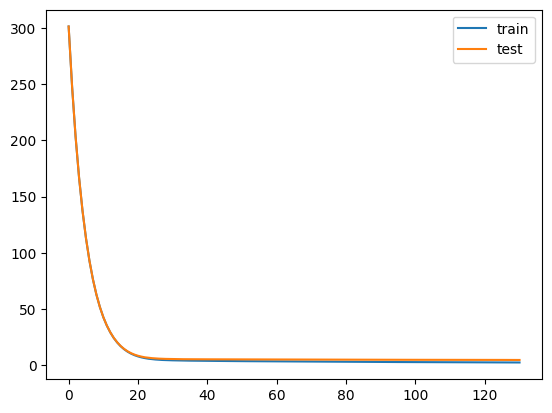

In [24]:
# plot learning curves
pyplot.plot(results['validation_0']['rmse'], label='train')
pyplot.plot(results['validation_1']['rmse'], label='test')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [25]:
# XGB_pred = pd.DataFrame(y_pred)
# XGB_pred.columns = ['pCO2XGB_testp']

# XGB_pred_train = pd.DataFrame(y_pred_train)
# XGB_pred_train.columns = ['pCO2XGB_trainp']

# XGB_pred.to_csv("XGBpred_test.csv",index=False)

# XGB_pred_train.to_csv("XGBpred_train.csv",index=False)

import shap

explainer = shap.KernelExplainer(model.predict,X)

shap_values = explainer.shap_values(X_test,nsamples=10,n_jobs=-1)

shap.summary_plot(shap_values,X_test)


X_test

shap_values

In [24]:
from joblib import dump
from joblib import load

In [33]:
# save model to file
# dump(model,"xgb_BoB.joblib3.dat")

['xgb_BoB.joblib3.dat']

In [26]:
# model1 = load("xgb_BoB_withoutLONLAT22.joblib.dat")

In [27]:
# model1.get_params()

In [28]:
# y_pred_train = model1.predict(X)
# y_pred_test = model1.predict(X_test)

In [29]:
# r2_train = r2_score(y,y_pred_train)
# print(r2_train)
# rmse_train = mean_squared_error(y,y_pred_train,squared=False)
# print(rmse_train)

In [30]:
# r2_test = r2_score(y_test,y_pred_test)
# print(r2_test)
# rmse_test = mean_squared_error(y_test,y_pred_test,squared=False)
# print(rmse_test)

In [31]:
# XGB_pred = pd.DataFrame(y_pred)
# XGB_pred.columns = ['pCO2XGB_testp']

# XGB_pred_train = pd.DataFrame(y_pred_train)
# XGB_pred_train.columns = ['pCO2XGB_trainp']

# XGB_pred.to_csv("XGBpred_test.csv",index=False)

# XGB_pred_train.to_csv("XGBpred_train.csv",index=False)

X_test[:,2:]

## RAMA 15,90 pCO2 predictions

In [32]:
df22 = pd.read_csv('Input_values_1590.csv',usecols=["SSS","SST"])

FileNotFoundError: [Errno 2] No such file or directory: 'Input_values_1590.csv'

In [ ]:
df22

In [ ]:
df22.SST.plot()

In [ ]:
y_predSat = model.predict(df22)

In [ ]:
y_predSat


In [ ]:
ypredSat = pd.DataFrame(y_predSat,columns=['pCO2XGB'])
ypredSat

#ypredSat.to_csv('pCO2XGBrama_SD.csv',index=None)

## Satelite 10years trend

dfsat = pd.read_csv('SateliteSSTnSSS.csv',usecols=['SST','SSS'])

dfsat.head()

dfsat.count()

ypredsat10 = model.predict(dfsat)

ypredsat10 = pd.DataFrame(ypredsat10,columns=['pCO2XGB_10yr_SSTnSSS'])
ypredsat10.count()

ypredsat10.head(10)

#ypredsat10.to_csv('pCO2XGB10yr_SD.csv',index=None)

print(model.feature_importances_)

a = model.feature_importances_

from matplotlib import pyplot

pyplot.bar(range(len(a)),a)

results = model.evals_result()

pyplot.figure(figsize=(6,4), dpi=600)
pyplot.plot(results['validation_0']['rmse'],label='train')
pyplot.plot(results['validation_1']['rmse'],label='test')
pyplot.legend()
pyplot.show()

## Satellite predictions with constant SSS trend

dfSatSSS = pd.read_csv('SateliteSSTnSSS (ConstantSSS).csv',usecols=['SST','SSSdtrnd'])

dfSatSSS = dfSatSSS.rename(columns={'SSSdtrnd':'SSS'})

dfSatSSS.head()

ypredsatconstSSS = model.predict(dfSatSSS)

ypredsatconstSSS = pd.DataFrame(ypredsatconstSSS,columns=['pCO2SatcnstSSS'])
ypredsatconstSSS.count()

#ypredsatconstSSS.to_csv('pCO2XGB_Sat_cnstSSS.csv',index=False)

## Satellite predictions with constant SST trend

dfSatSST = pd.read_csv('SateliteSSTnSSS (ConstantSST) .csv',usecols=['SSTdtrnd','SSS'])

dfSatSST = dfSatSST.rename(columns={'SSTdtrnd':'SST'})

dfSatSST.head()

ypredsatconstSST = model.predict(dfSatSST)

ypredsatconstSST = pd.DataFrame(ypredsatconstSST,columns=['pCO2SatcnstSST'])
ypredsatconstSST.count()

#ypredsatconstSST.to_csv('pCO2XGB_Sat_cnstSST.csv',index=False)

## Satellite predictions with constant SSS

dfSatcnstSSS = pd.read_csv('SateliteSSTnSSS (ConstantSSS).csv',usecols=['SST','SSS'])

dfSatcnstSSS.head()

ypredSSSmagcnst = model.predict(dfSatcnstSSS)

ypredSSSmagcnst = pd.DataFrame(ypredSSSmagcnst,columns=['pCO2magcnstSSS'])

ypredSSSmagcnst.head()

#ypredSSSmagcnst.to_csv('constnMAGSSS.csv',index=False)

## Satellite predictions with constant SST

dfSatcnstSST = pd.read_csv('SateliteSSTnSSS (ConstantSST) .csv',usecols=['SST','SSS'])

dfSatcnstSST.head()

ypredSSTmagcnst = model.predict(dfSatcnstSST)

ypredSSTmagcnst = pd.DataFrame(ypredSSTmagcnst,columns=['pCO2magcnstSST'])

ypredSSTmagcnst.head()

#ypredSSTmagcnst.to_csv('constnMAGSST.csv',index=False)